# Analysis of a plane frame

Import modules

In [1]:
import sys
import numpy as np
sys.path.insert(0, r'D:\Users\Jonas\Development\calfem-python')
import calfem.core as cfc
import calfem.utils as cfu
import calfem.vis_mpl as cfv
import tabulate as tab


Define topology

In [2]:
edof = np.array([
    [4, 5, 6, 1, 2, 3], 
    [7, 8, 9, 10, 11, 12], 
    [4, 5, 6, 7, 8, 9]
])

Setup stiffness matrix K and load vector f

In [3]:
K = np.array(np.zeros((12, 12)))
f = np.array(np.zeros((12, 1)))
f[3] = 2.0e3

Setup element stiffness and element load matrices

In [4]:
E = 200.0e9
A1 = 2.0e-3
A2 = 6.0e-3
I1 = 1.6e-5
I2 = 5.4e-5

ep1 = np.array([E, A1, I1])
ep3 = np.array([E, A2, I2])
ex1 = np.array([0, 0])
ex2 = np.array([6, 6])
ex3 = np.array([0, 6])
ey1 = np.array([4, 0])
ey2 = np.array([4, 0])
ey3 = np.array([4, 4])
eq1 = np.array([0, 0])
eq2 = np.array([0, 0])
eq3 = np.array([0, -10e3])

Ke1 = cfc.beam2e(ex1, ey1, ep1)
Ke2 = cfc.beam2e(ex2, ey2, ep1)
Ke3, fe3 = cfc.beam2e(ex3, ey3, ep3, eq3)

Assemble Ke into K

In [5]:
K = cfc.assem(edof[0, :], K, Ke1)
K = cfc.assem(edof[1, :], K, Ke2)
K, f = cfc.assem(edof[2, :], K, Ke3, f, fe3)

Solve the system of equations and compute reactions

In [6]:
bc = np.array([1, 2, 3, 10, 11])
a, r = cfc.solveq(K, f, bc)

cfu.disp_array(a, ["a (m)"])
cfu.disp_array(r, ["r (N)"])

,a (m)
0,0.0000e+00
1,0.0000e+00
2,0.0000e+00
3,7.5357e-03
4,-2.8741e-04
5,-5.3735e-03
6,7.5161e-03
7,-3.1259e-04
8,4.6656e-03
9,0.0000e+00


,r (N)
0,1.9268e+03
1,2.8741e+04
2,4.4527e+02
3,0.0000e+00
4,0.0000e+00
5,0.0000e+00
6,-2.3283e-10
7,3.6380e-12
8,3.6380e-12
9,-3.9268e+03


Section forces

In [7]:
ed = cfc.extract_ed(edof, a)

es1, edi1, ec1 = cfc.beam2s(ex1, ey1, ep1, ed[0, :], eq1, nep=21)
es2, edi2, ec2 = cfc.beam2s(ex2, ey2, ep1, ed[1, :], eq2, nep=21)
es3, edi3, ec3 = cfc.beam2s(ex3, ey3, ep3, ed[2, :], eq3, nep=21)

cfu.disp_h2("es1")
cfu.disp_array(es1, ["N", "Vy", "Mz"])
cfu.disp_h2("edi1")
cfu.disp_array(edi1, ["u1", "v1"])
cfu.disp_h2("es2")
cfu.disp_array(es2, ["N", "Vy", "Mz"])
cfu.disp_h2("edi2")
cfu.disp_array(edi2, ["u1", "v1"])
cfu.disp_h2("es3")
cfu.disp_array(es3, ["N", "Vy", "Mz"])
cfu.disp_h2("edi3")
cfu.disp_array(edi3, ["u1", "v1"])


,N,Vy,Mz
0,-2.8741e+04,1.9268e+03,8.1523e+03
1,-2.8741e+04,1.9268e+03,7.7670e+03
2,-2.8741e+04,1.9268e+03,7.3816e+03
3,-2.8741e+04,1.9268e+03,6.9963e+03
4,-2.8741e+04,1.9268e+03,6.6109e+03
5,-2.8741e+04,1.9268e+03,6.2256e+03
6,-2.8741e+04,1.9268e+03,5.8402e+03
7,-2.8741e+04,1.9268e+03,5.4548e+03
8,-2.8741e+04,1.9268e+03,5.0695e+03
9,-2.8741e+04,1.9268e+03,4.6841e+03


,u1,v1
0,2.8741e-04,7.5357e-03
1,2.7304e-04,6.5112e-03
2,2.5867e-04,5.5837e-03
3,2.4430e-04,4.7485e-03
4,2.2993e-04,4.0008e-03
5,2.1556e-04,3.3357e-03
6,2.0119e-04,2.7484e-03
7,1.8682e-04,2.2341e-03
8,1.7245e-04,1.7880e-03
9,1.5807e-04,1.4053e-03


,N,Vy,Mz
0,-3.1259e+04,-3.9268e+03,-1.5707e+04
1,-3.1259e+04,-3.9268e+03,-1.4922e+04
2,-3.1259e+04,-3.9268e+03,-1.4136e+04
3,-3.1259e+04,-3.9268e+03,-1.3351e+04
4,-3.1259e+04,-3.9268e+03,-1.2566e+04
5,-3.1259e+04,-3.9268e+03,-1.1780e+04
6,-3.1259e+04,-3.9268e+03,-1.0995e+04
7,-3.1259e+04,-3.9268e+03,-1.0210e+04
8,-3.1259e+04,-3.9268e+03,-9.4242e+03
9,-3.1259e+04,-3.9268e+03,-8.6389e+03


,u1,v1
0,3.1259e-04,7.5161e-03
1,2.9696e-04,8.3527e-03
2,2.8133e-04,9.0027e-03
3,2.6570e-04,9.4761e-03
4,2.5007e-04,9.7825e-03
5,2.3444e-04,9.9319e-03
6,2.1881e-04,9.9341e-03
7,2.0318e-04,9.7988e-03
8,1.8755e-04,9.5359e-03
9,1.7193e-04,9.1552e-03


,N,Vy,Mz
0,-3.9268e+03,-2.8741e+04,-8.1523e+03
1,-3.9268e+03,-2.5741e+04,1.9953e+01
2,-3.9268e+03,-2.2741e+04,7.2922e+03
3,-3.9268e+03,-1.9741e+04,1.3664e+04
4,-3.9268e+03,-1.6741e+04,1.9137e+04
5,-3.9268e+03,-1.3741e+04,2.3709e+04
6,-3.9268e+03,-1.0741e+04,2.7381e+04
7,-3.9268e+03,-7.7409e+03,3.0154e+04
8,-3.9268e+03,-4.7409e+03,3.2026e+04
9,-3.9268e+03,-1.7409e+03,3.2998e+04


,u1,v1
0,7.5357e-03,-2.8741e-04
1,7.5347e-03,-1.9218e-03
2,7.5337e-03,-3.5566e-03
3,7.5328e-03,-5.1312e-03
4,7.5318e-03,-6.5927e-03
5,7.5308e-03,-7.8952e-03
6,7.5298e-03,-9.0009e-03
7,7.5288e-03,-9.8789e-03
8,7.5279e-03,-1.0506e-02
9,7.5269e-03,-1.0868e-02


Draw deformed frame

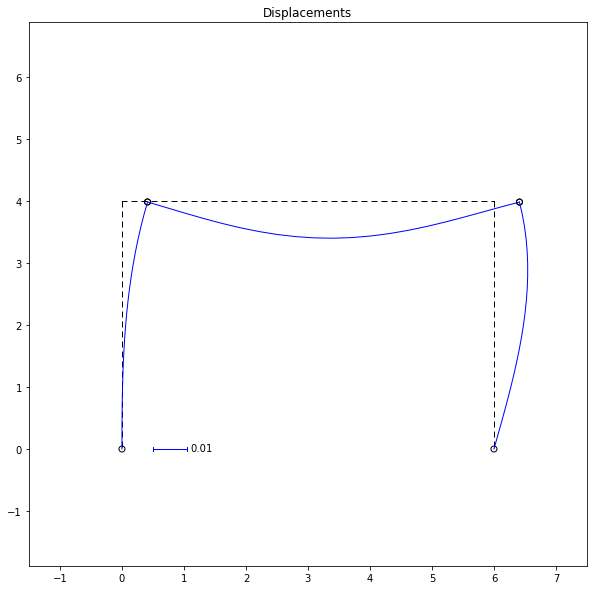

In [8]:
plotpar = [2, 1, 0]
sfac = cfv.scalfact2(ex3, ey3, edi3, 0.1)
cfu.disp(f"sfac={sfac}")

cfv.figure(1, fig_size=(10, 10))
cfv.eldraw2(ex1, ey1, plotpar)
cfv.eldraw2(ex2, ey2, plotpar)
cfv.eldraw2(ex3, ey3, plotpar)

plotpar = [1, 2, 1]
cfv.dispbeam2(ex1, ey1, edi1, plotpar, sfac)
cfv.dispbeam2(ex2, ey2, edi2, plotpar, sfac)
cfv.dispbeam2(ex3, ey3, edi3, plotpar, sfac)
cfv.axis([-1.5, 7.5, -0.5, 5.5])
plotpar1 = 2
cfv.scalgraph2(sfac, [1e-2, 0.5, 0], plotpar1)
cfv.title("Displacements")

Draw normal force diagram

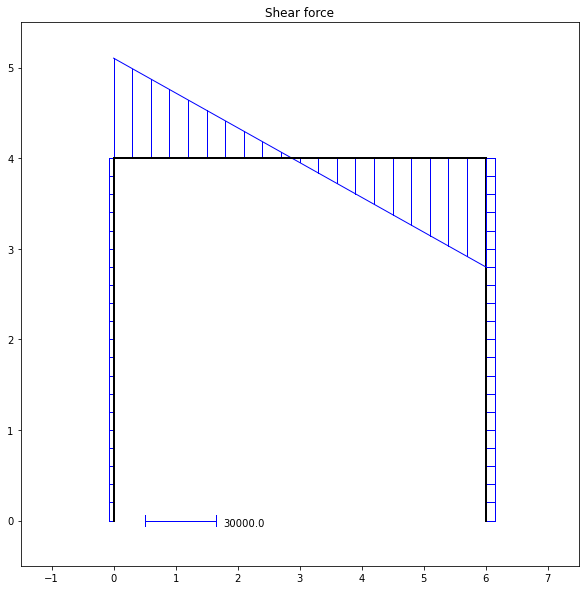

In [9]:
plotpar = [2, 1]
sfac = cfv.scalfact2(ex3, ey3, es3[:, 1], 0.2)
cfv.figure(3, fig_size=(10, 10))
cfv.secforce2(ex1, ey1, es1[:, 1], plotpar, sfac)
cfv.secforce2(ex2, ey2, es2[:, 1], plotpar, sfac)
cfv.secforce2(ex3, ey3, es3[:, 1], plotpar, sfac)
cfv.axis([-1.5, 7.5, -0.5, 5.5])
cfv.scalgraph2(sfac, [3e4, 0.5, 0], plotpar1)
cfv.title("Shear force")

Draw shear force diagram

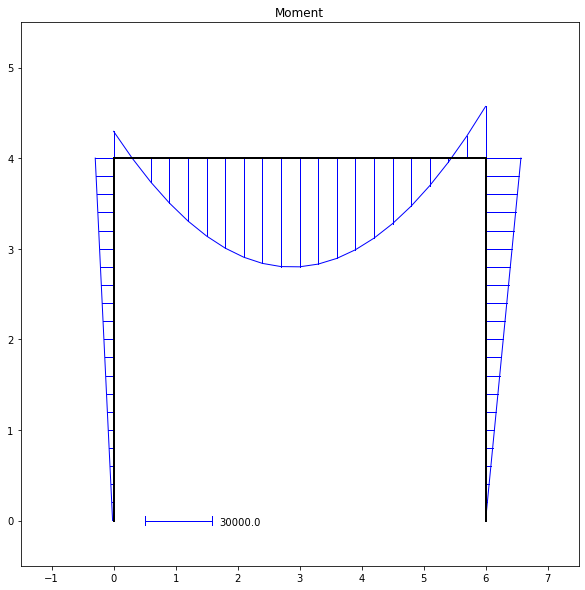

In [10]:
plotpar = [2, 1]
sfac = cfv.scalfact2(ex3, ey3, es3[:, 2], 0.2)
cfu.disp(f"sfac={sfac}")

cfv.figure(4, fig_size=(10, 10))
cfv.secforce2(ex1, ey1, es1[:, 2], plotpar, sfac)
cfv.secforce2(ex2, ey2, es2[:, 2], plotpar, sfac)
cfv.secforce2(ex3, ey3, es3[:, 2], plotpar, sfac)
cfv.axis([-1.5, 7.5, -0.5, 5.5])
cfv.scalgraph2(sfac, [3e4, 0.5, 0], plotpar1)
cfv.title("Moment")

Draw moment diagram

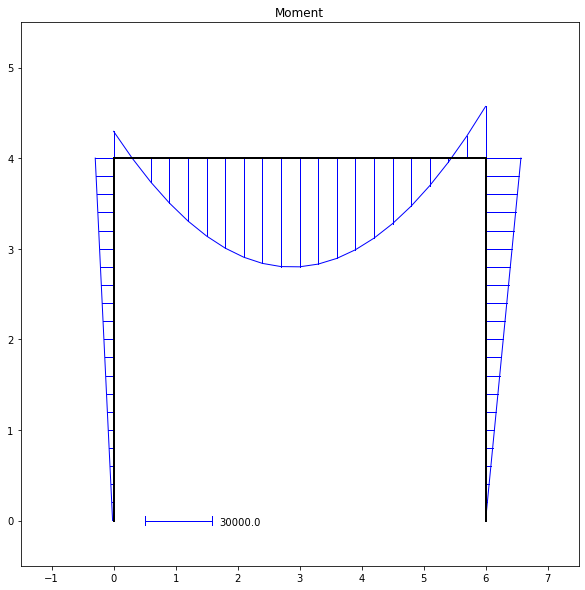

In [11]:
plotpar = [2, 1]
sfac = cfv.scalfact2(ex3, ey3, es3[:, 2], 0.2)
cfu.disp(f"sfac={sfac}")

cfv.figure(4, fig_size=(10, 10))
cfv.secforce2(ex1, ey1, es1[:, 2], plotpar, sfac)
cfv.secforce2(ex2, ey2, es2[:, 2], plotpar, sfac)
cfv.secforce2(ex3, ey3, es3[:, 2], plotpar, sfac)
cfv.axis([-1.5, 7.5, -0.5, 5.5])
cfv.scalgraph2(sfac, [3e4, 0.5, 0], plotpar1)
cfv.title("Moment")